26x26 Matrix:
     0    1    2    3    4    5    6    7    8    9   ...   16   17   18   19  \
0   2.0 -6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  -6.0  8.0 -6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0 -6.0  8.0 -6.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0 -6.0  8.0 -6.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0 -6.0  8.0 -6.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0 -6.0  8.0 -6.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0 -6.0  8.0 -6.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0 -6.0  8.0 -6.0  0.0  ...  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0 -6.0  8.0 -6.0  ...  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -6.0  8.0  ...  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -6.0  ...  0.0  0.0  0.0  0.0   
11  0.0  0.0  

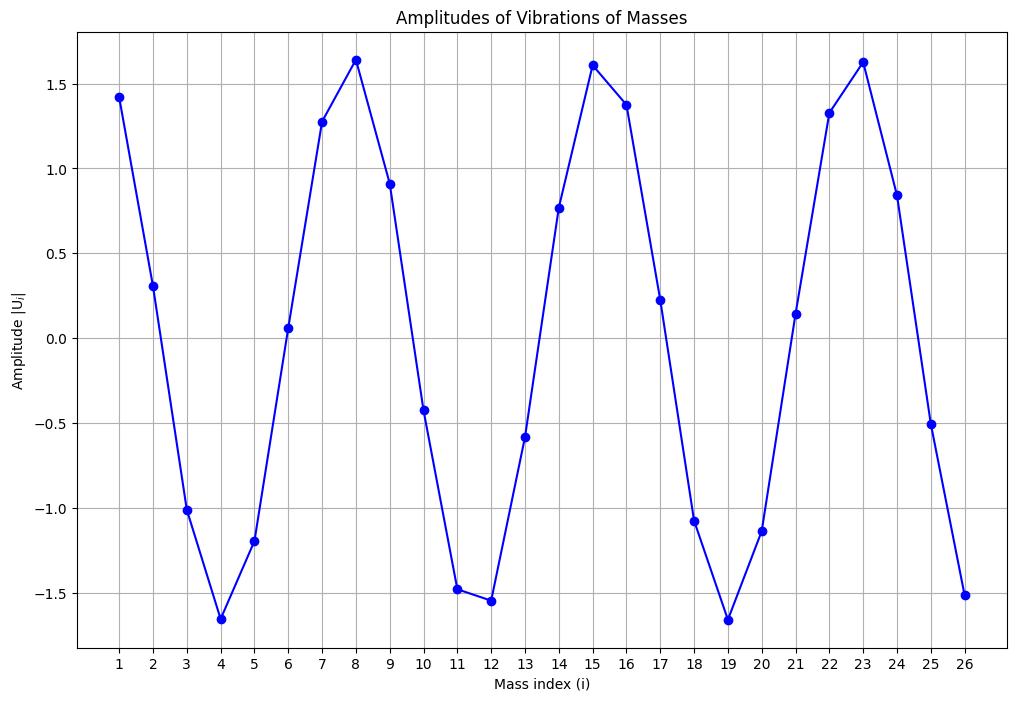

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
N = 26          # Number of masses
m = 1.0         # Mass of each object
k = 6.0         # Spring constant
C = 1.0         # External force
omega = 2.0     # Angular frequency

# Calculating alpha (main diagonal element)
alpha = 2 * k - m * omega**2

# Constructing the main diagonal (alpha) and the off-diagonals (-k)
main_diagonal = [alpha] * N
main_diagonal[0] = alpha - k     # Adjusting the first element
main_diagonal[-1] = alpha - k    # Adjusting the last element
off_diagonal = [-k] * (N - 1)

# Creating the tridiagonal matrix
matrix = np.diag(main_diagonal) + np.diag(off_diagonal, k=1) + np.diag(off_diagonal, k=-1)

# Convert matrix to DataFrame for better display
matrix_df = pd.DataFrame(matrix)
print("26x26 Matrix:")
print(matrix_df)

# Constructing the right-hand side vector with external force applied to the first mass
rhs = np.zeros(N)
rhs[0] = C  # External force applied to the first mass

# Solving for the displacement amplitudes Ui
U = np.linalg.solve(matrix, rhs)

# Calculating the amplitudes of each mass
amplitudes = np.abs(U)

# Plotting the amplitudes of the vibrations for each mass
plt.figure(figsize=(12, 8))
plt.plot(range(1, N + 1), U, marker='o', color='b', linestyle='-', markersize=6)
plt.xlabel("Mass index (i)")
plt.ylabel("Amplitude |U$_i$|")
plt.title("Amplitudes of Vibrations of Masses")
plt.xticks(range(1, N + 1))  # Ensures all mass indices are visible on the x-axis
plt.grid(True)
plt.show()